<a href="https://colab.research.google.com/github/anshikabajpai23/Eatify/blob/main/major.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
!pip install pyfpgrowth


In [ ]:
# @markdown ###Loading dependencies
import time
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure, rcParams
import sys
import numpy as np, itertools
from itertools import chain, combinations
from collections import defaultdict
from optparse import OptionParser
import csv
import pyfpgrowth

generalized_support=0.2
support_generalized=0.2*32
maximum=35
rcParams['figure.figsize'] = 15, 10

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Time Taken is:
6.711228132247925


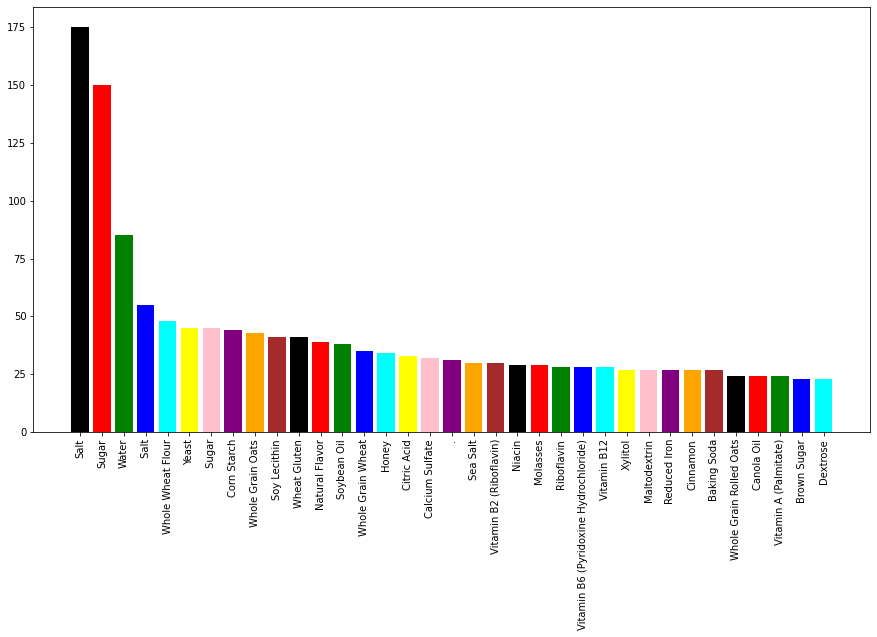

In [ ]:
# @markdown ###MOST FREQUENT ITEMS
data = pd.read_csv("packaged_food.csv")
# for data visulaization we filter first 3 datasets
columns = list(data)
col = list(data)
start = time.time()
#print(data.index)
for i in columns:
  for j in range(len(data.index)):
      if not pd.isnull(data[i][j]):
        col.append(data[i][j])
        #print(data[i][j])


freq = {}
for item in col:
  if (item in freq):
    freq[item] += 1
  else:
    freq[item] = 1

end = time.time()

rem_list=[]
for key,value in freq.items():
  if key.startswith("Unnamed"):
    rem_list.append(key)
[freq.pop(key) for key in rem_list]

print("Time Taken is:")
print(end-start)
import numpy as np
k=freq.keys()
v=freq.values()
sortedfreq={k: v for k, v in sorted(freq.items(), key=lambda item: item[1],reverse=True)}
mydict={}
num=0
for key,value in sortedfreq.items():
  if num<maximum:
    mydict[key]=value
    num=num+1
k=mydict.keys()
v=mydict.values()
y_pos = np.arange(len(k))
plt.bar(y_pos, v, color=['black', 'red', 'green', 'blue', 'cyan','yellow','pink','purple','orange','brown'])
plt.xticks(y_pos, k,rotation=90)
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:135: DeprecationWarning: 'U' mode is deprecated


items:  222
Time Taken is:
0.02108025550842285


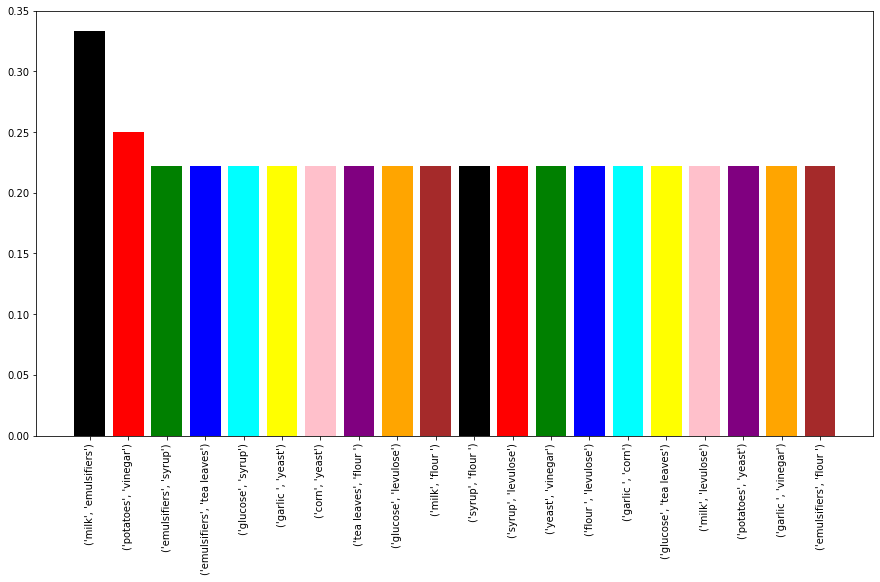

In [ ]:
# @markdown ### ORIGINAL Apriori

def subsets(arr):
    """ Returns non empty subsets of arr"""
    return chain(*[combinations(arr, i + 1) for i, a in enumerate(arr)])


def returnItemsWithMinSupport(itemSet, transactionList, minSupport, freqSet):
    """calculates the support for items in the itemSet and returns a subset
    of the itemSet each of whose elements satisfies the minimum support"""
    _itemSet = set()
    localSet = defaultdict(int)

    for item in itemSet:
        for transaction in transactionList:
            if item.issubset(transaction):
                freqSet[item] += 1
                localSet[item] += 1

    for item, count in localSet.items():
        support = float(count) / len(transactionList)

        if support >= minSupport:
            _itemSet.add(item)

    return _itemSet


def joinSet(itemSet, length):
    """Join a set with itself and returns the n-element itemsets"""
    return set(
        [i.union(j) for i in itemSet for j in itemSet if len(i.union(j)) == length]
    )


def getItemSetTransactionList(data_iterator):
    transactionList = list()
    itemSet = set()
    for record in data_iterator:
        #print('record: ',record)
        transaction = frozenset(record)
        transactionList.append(transaction)
        for item in transaction:
            if item != "oil" and item != "spices" and item != "salt" and item != "sugar" :
              itemSet.add(frozenset([item]))  # Generate 1-itemSets
    return itemSet, transactionList


def runApriori(data_iter, minSupport, minConfidence):
    """
    run the apriori algorithm. data_iter is a record iterator
    Return both:
     - items (tuple, support)
     - rules ((pretuple, posttuple), confidence)
    """
    itemSet, transactionList = getItemSetTransactionList(data_iter)
    #print("itemset",itemSet)
    #print("transactionList",transactionList)
    freqSet = defaultdict(int)
    largeSet = dict()
    # Global dictionary which stores (key=n-itemSets,value=support)
    # which satisfy minSupport

    assocRules = dict()
    # Dictionary which stores Association Rules

    oneCSet = returnItemsWithMinSupport(itemSet, transactionList, minSupport, freqSet)

    currentLSet = itemSet
    k = 2
    while currentLSet != set([]):
        largeSet[k - 1] = currentLSet
        currentLSet = joinSet(currentLSet, k)
        currentCSet = returnItemsWithMinSupport(
            currentLSet, transactionList, minSupport, freqSet
        )
        currentLSet = currentCSet
        k = k + 1

    def getSupport(item):
        """local function which Returns the support of an item"""
        return float(freqSet[item]) / len(transactionList)

    toRetItems = []
    for key, value in largeSet.items():
        toRetItems.extend([(tuple(item), getSupport(item)) for item in value])

    toRetRules = []
    """
    for key, value in list(largeSet.items())[1:]:
        for item in value:
            _subsets = map(frozenset, [x for x in subsets(item)])
            for element in _subsets:
                remain = item.difference(element)
                if len(remain) > 0:
                    confidence = getSupport(item) / getSupport(element)
                    if confidence >= minConfidence:
                        toRetRules.append(((tuple(element), tuple(remain)), confidence))
    """
    return toRetItems, toRetRules


def printResults(items, rules):
    k=[]
    v=[]
    num=0
    for item,support in sorted(items,key=lambda x: x[1],reverse=True) :
      if num<maximum and len(item)>1:
        #print("item length: ",len(item))
        k.append(str(item))
        v.append(support)
        num=num+1
    y_pos = np.arange(len(k))
    plt.bar(y_pos, v, color=['black', 'red', 'green', 'blue', 'cyan','yellow','pink','purple','orange','brown'])
    plt.xticks(y_pos, k,rotation=90)
    plt.subplots_adjust(bottom=0.4, top=0.99)
    plt.show()

def to_str_results(items, rules):
    """prints the generated itemsets sorted by support and the confidence rules sorted by confidence"""
    i, r = [], []
    for item, support in sorted(items, key=lambda x: x[1]):
        x = "item: %s , %.3f" % (str(item), support)
        i.append(x)

    for rule, confidence in sorted(rules, key=lambda x: x[1]):
        pre, post = rule
        x = "Rule: %s ==> %s , %.3f" % (str(pre), str(post), confidence)
        r.append(x)

    return i, r

def dataFromFile(fname):
    """Function which reads from the file and yields a generator"""
    with open(fname, "rU") as file_iter:
        for line in file_iter:
            line = line.strip().rstrip(",")  # Remove trailing comma
            record = frozenset(line.split(","))
            yield record

inFile = dataFromFile('/content/packaged_food.csv')
minSupport = generalized_support
minConfidence =  0.8
start = time.time()
items, rules = runApriori(inFile, minSupport, minConfidence)
end = time.time()
print("items: ",len(items))
print("Time Taken is:")
print(end-start)
printResults(items, rules)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:135: DeprecationWarning: 'U' mode is deprecated


items:  162
Time Taken is:
0.0067212581634521484


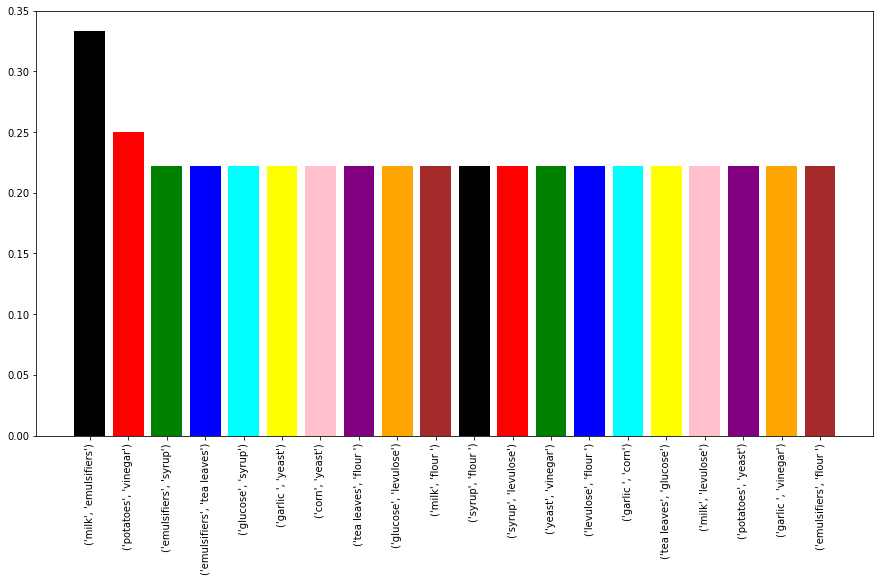

In [ ]:
# @markdown ### Improved Apriori full

def subsets(arr):
    """ Returns non empty subsets of arr"""
    return chain(*[combinations(arr, i + 1) for i, a in enumerate(arr)])


def returnItemsWithMinSupport(itemSet, transactionList, minSupport, freqSet):
    """calculates the support for items in the itemSet and returns a subset
    of the itemSet each of whose elements satisfies the minimum support"""
    _itemSet = set()
    localSet = defaultdict(int)

    for item in itemSet:
        for transaction in transactionList:
            if item.issubset(transaction):
                freqSet[item] += 1
                localSet[item] += 1

    for item, count in localSet.items():
        support = float(count) / len(transactionList)

        if support >= minSupport:
            _itemSet.add(item)

    return _itemSet


def joinSet(itemSet, length):
    """Join a set with itself and returns the n-element itemsets"""
    return set(
        [i.union(j) for i in itemSet for j in itemSet if len(i.union(j)) == length]
    )


def getItemSetTransactionList(data_iterator):
    transactionList = list()
    itemSet = set()
    for record in data_iterator:
        #print('record: ',record)
        transaction = frozenset(record)
        transactionList.append(transaction)
        for item in transaction:
            if item != "oil" and item != "spices" and item != "salt" and item != "sugar" :
              itemSet.add(frozenset([item]))  # Generate 1-itemSets
    return itemSet, transactionList


def runimprovedApriori(data_iter, minSupport, minConfidence):
    """
    run the apriori algorithm. data_iter is a record iterator
    Return both:
     - items (tuple, support)
     - rules ((pretuple, posttuple), confidence)
    """
    itemSet, transactionList = getItemSetTransactionList(data_iter)
    #print("itemset",itemSet)
    #print("transactionList",transactionList)
    freqSet = defaultdict(int)
    largeSet = dict()
    # Global dictionary which stores (key=n-itemSets,value=support)
    # which satisfy minSupport

    assocRules = dict()
    # Dictionary which stores Association Rules

    oneCSet = returnItemsWithMinSupport(itemSet, transactionList, minSupport, freqSet)

    currentLSet = oneCSet
    k = 2
    while currentLSet != set([]):
        largeSet[k - 1] = currentLSet
        currentLSet = joinSet(currentLSet, k)
        currentCSet = returnItemsWithMinSupport(
            currentLSet, transactionList, minSupport, freqSet
        )
        currentLSet = currentCSet
        k = k + 1

    def getSupport(item):
        """local function which Returns the support of an item"""
        return float(freqSet[item]) / len(transactionList)

    toRetItems = []
    for key, value in largeSet.items():
        toRetItems.extend([(tuple(item), getSupport(item)) for item in value])

    toRetRules = []
    """
    for key, value in list(largeSet.items())[1:]:
        for item in value:
            _subsets = map(frozenset, [x for x in subsets(item)])
            for element in _subsets:
                remain = item.difference(element)
                if len(remain) > 0:
                    confidence = getSupport(item) / getSupport(element)
                    if confidence >= minConfidence:
                        toRetRules.append(((tuple(element), tuple(remain)), confidence))
    """
    return toRetItems, toRetRules


def printResults(items, rules):
    k=[]
    v=[]
    num=0
    for item,support in sorted(items,key=lambda x: x[1],reverse=True) :
      if num<maximum and len(item)>1:
        #print("item length: ",len(item))
        k.append(str(item))
        v.append(support)
        num=num+1
    y_pos = np.arange(len(k))
    plt.bar(y_pos, v, color=['black', 'red', 'green', 'blue', 'cyan','yellow','pink','purple','orange','brown'])
    plt.xticks(y_pos, k,rotation=90)
    plt.subplots_adjust(bottom=0.4, top=0.99)
    plt.show()

def to_str_results(items, rules):
    """prints the generated itemsets sorted by support and the confidence rules sorted by confidence"""
    i, r = [], []
    for item, support in sorted(items, key=lambda x: x[1]):
        x = "item: %s , %.3f" % (str(item), support)
        i.append(x)

    for rule, confidence in sorted(rules, key=lambda x: x[1]):
        pre, post = rule
        x = "Rule: %s ==> %s , %.3f" % (str(pre), str(post), confidence)
        r.append(x)

    return i, r

def dataFromFile(fname):
    """Function which reads from the file and yields a generator"""
    with open(fname, "rU") as file_iter:
        for line in file_iter:
            line = line.strip().rstrip(",")  # Remove trailing comma
            record = frozenset(line.split(","))
            yield record

inFile = dataFromFile('/content/packaged_food.csv')
minSupport = generalized_support
minConfidence =  0.8
start = time.time()
items, rules = runimprovedApriori(inFile, minSupport, minConfidence)
end = time.time()
print("items: ",len(items))
print("Time Taken is:")
print(end-start)
printResults(items, rules)

In [ ]:
# @markdown ###ECLAT Algorithm
np.random.seed(1)
kot = 0
FreqItems = dict()
support = dict()


def eclat(prefix, items, dict_id):
    while items:
        i,itids = items.pop()
        isupp = len(itids)
        if isupp >= minsup:

            FreqItems[frozenset(prefix + [i])] = isupp
            suffix = []
            for j, ojtids in items:
                jtids = itids & ojtids
                if len(jtids) >= minsup:
                    suffix.append((j,jtids))

            dict_id += 1
            eclat(prefix+[i], sorted(suffix, key=lambda item: len(item[1]), reverse=True), dict_id)



def print_Frequent_Itemsets(output_FreqItems, FreqItems):
    file = open(output_FreqItems, 'w+')
    for item, support in FreqItems.items():
        file.write(" {} : {} \n".format(list(item), round(support,4)))



def Read_Data(filename, delimiter=','):
    data = {}
    trans = 0
    f = open(filename, 'r', encoding="utf8")
    for row in f:
        trans += 1
        for item in row.split(delimiter):
            if item not in data:
                data[item] = set()
            data[item].add(trans)
    f.close()
    return data

minsup   = support_generalized
confidence = 80
output_FreqItems = 'output_freqitems.csv'
output_Rules = 'output_rule.csv'
dict_id = 0
data = Read_Data('packaged_food.csv', ',') #change the delimiter based on your input file
data.pop("\n",None)
data.pop("",None)
print('finished reading data..... \n Starting mining .....')

finished reading data..... 
 Starting mining .....


Time Taken is:
0.09216165542602539
found 7369 Frequent items


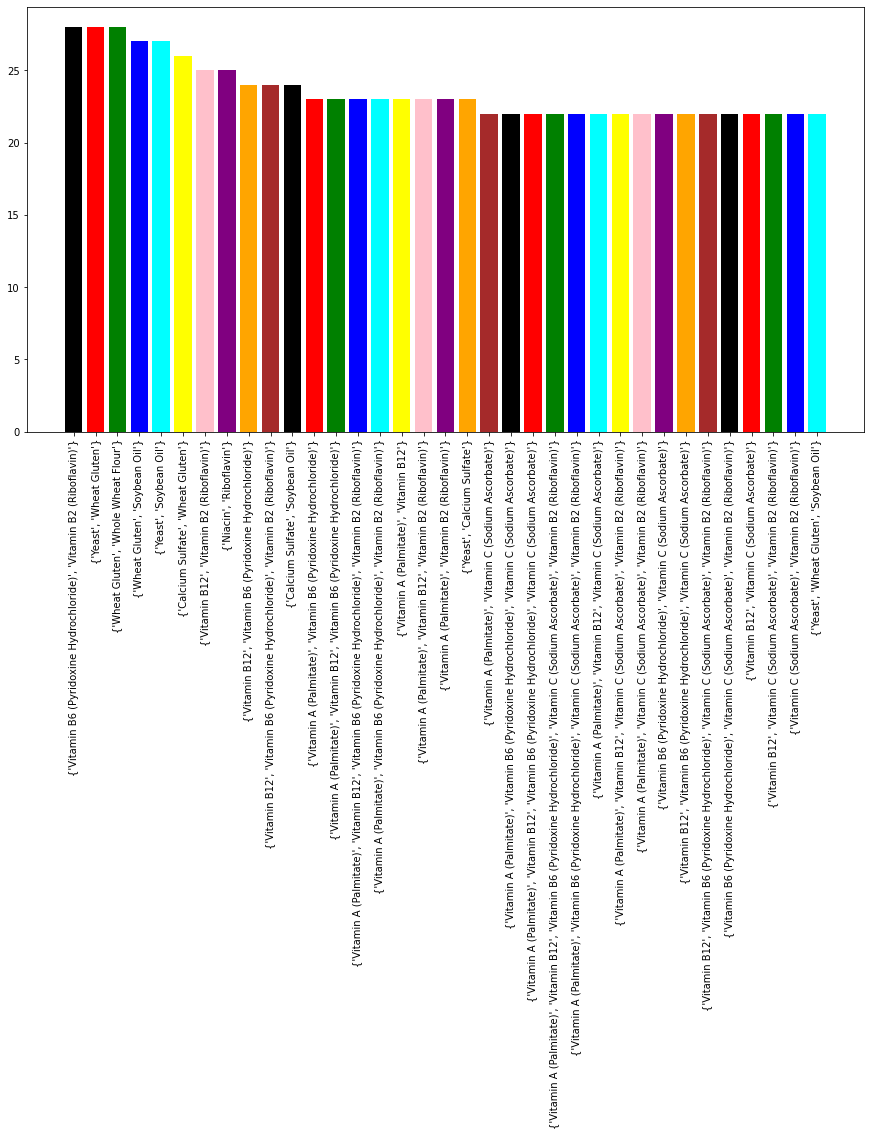

In [ ]:
# @markdown ###ECLAT continued...
del data['water']
del data['sugar']
del data['Water']
del data['Sugar']
try:
  del data['oil']
except:
  pass
try:
  del data['spices']
except:
  pass
del data['salt']
del data['Salt']
del data[' Salt']
start = time.time()

eclat([], sorted(data.items(), key=lambda item: len(item[1]), reverse=True), dict_id)
end = time.time()

print("Time Taken is:")
print(end-start)
print('found %d Frequent items' % len(FreqItems))
mydict={}
num=0
FreqItems={k: v for k, v in sorted(FreqItems.items(), key=lambda item: item[1],reverse=True)}

for key,value in FreqItems.items():
  if num<maximum and len(key)>1:
    mydict[key]=value
    num=num+1

key=mydict.keys()
k=[]
for i in key:
  k.append(set(i))
v=mydict.values()
y_pos = np.arange(len(k))
plt.bar(y_pos, v, color=['black', 'red', 'green', 'blue', 'cyan','yellow','pink','purple','orange','brown'])
plt.xticks(y_pos, k,rotation=90)
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.show()

time:  0.12604355812072754
items:  8490


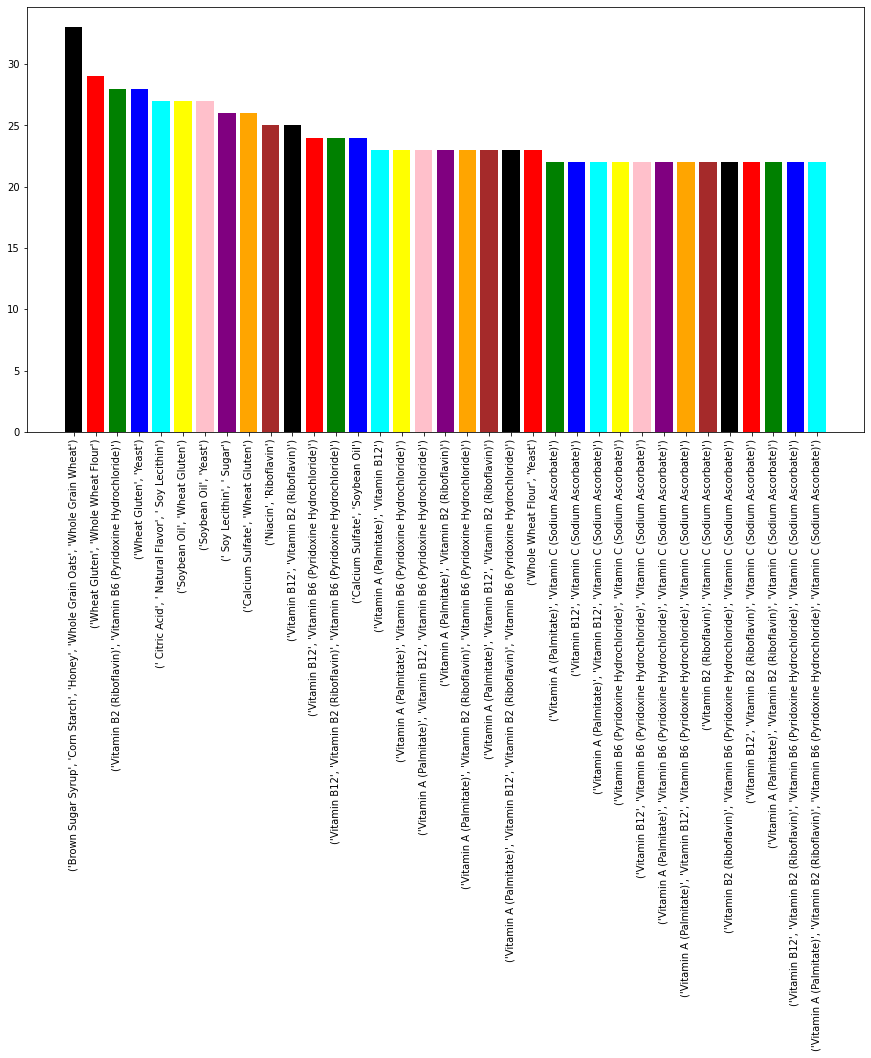

In [ ]:
# @markdown ###FP GROWTH Algorithm

with open('packaged_food.csv', newline='') as f:
    reader = csv.reader(f)
    #if reader == '':
     # continue
    your_list = list(reader)

redundant=["","salt",'oil',"sugar","spices"," ","Water"," Salt","Salt","Sugar"]
#print(len(your_list))
#print(your_list)

for i in range(500):
  index=[]
  j=0
  for ele in your_list[i]:
    if ele in redundant:
      index.append(ele)
 # print(index)
  for ab in index:
    your_list[i].remove(ab)


your_list=your_list[:500]
#print(len(your_list))
#print(your_list)
for integer in range(len(your_list)):
  new_list=[]
  new_list=list(filter(None, your_list[integer]))


  your_list[integer]=new_list

start = time.time()
freq = pyfpgrowth.find_frequent_patterns(your_list, support_generalized)
end = time.time()
print("time: " ,end-start)
print("items: ",len(freq))

k=freq.keys()
v=freq.values()
sortedfreq={k: v for k, v in sorted(freq.items(), key=lambda item: item[1],reverse=True)}
mydict={}
num=0
for key,value in sortedfreq.items():
  if num<maximum and len(key)>1:
    mydict[key]=value
    num=num+1
k=mydict.keys()
v=mydict.values()
y_pos = np.arange(len(k))
plt.bar(y_pos, v, color=['black', 'red', 'green', 'blue', 'cyan','yellow','pink','purple','orange','brown'])
plt.xticks(y_pos, k,rotation=90)
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_excel("/content/gdrive/MyDrive/MAJOR/datasets/Algorithms_dataset/Analysis.xlsx")
df

,Confidence,item_size,support,time_apriori,time_improved_apriori,time_eclat,time_fpgrowth,sets_apriori,sets_improved_apriori,sets_eclat,sets_fpgrowth,improved_apriori,time_apriori.1
0,0.8,32.0,0.3000,0.01496,0.001370,0.00013,0.00056,76.0,4,5,5,0.001370,0.01496
1,NaN,32.0,0.2500,0.01648,0.002830,0.00062,0.00151,77.0,8,161,161,0.002830,0.01648
2,NaN,32.0,0.2000,0.02322,0.011570,0.00121,0.00147,222.0,162,192,168,0.011570,0.02322
3,NaN,32.0,0.1500,0.03343,0.023230,0.00205,0.00374,315.0,257,659,649,0.023230,0.03343
4,NaN,NaN,0.1400,0.09994,0.021570,0.00241,0.00685,315.0,257,659,649,0.021570,0.09994
5,NaN,NaN,0.1300,0.19816,0.171870,0.00242,0.00868,712.0,661,659,649,0.171870,0.19816
6,NaN,NaN,0.1200,0.19813,0.215808,0.12624,0.09789,712.0,661,33421,33414,0.215808,0.19813
7,NaN,NaN,0.1150,0.24003,0.235590,0.12701,0.08782,712.0,661,33421,33414,0.235590,0.24003
8,NaN,NaN,0.1130,0.24946,0.226910,0.13708,0.08814,712.0,661,33421,33414,0.226910,0.24946
9,NaN,NaN,0.1111,10.00000,10.000000,0.28931,0.09253,NaN,661,33421,33414,644.000000,700.00000


In [ ]:
#From the above figugre we can see that the most freq items are 'Brown Sugar Syrup','Corn Starch','Honey','Whole Grain Oats','Whole Grain Wheat'
highest_freq=['Brown Sugar Syrup','Corn Starch','Honey','Whole Grain Oats','Whole Grain Wheat']
diseases=pd.read_csv('diseases.csv')
diseases['ingredients']=diseases['ingredients'].astype(str)
start=time.time()
for i in highest_freq:
  for j in range(len(diseases['ingredients'])):
   # print("i is {} and j is {} ".format(i,diseases['ingredients'][j]))
    if i.lower()==(diseases['ingredients'][j]).lower():
      print("{} is harmful for your health, it may cause D1".format(i))
#TIME COMPLEXITY IS M*N
end=time.time()
print("TIME COMPLEXITY NORMAL: {}".format(end-start))


start=time.time()
def binarySearch(arr, x):
    l = 0
    r = len(arr)
    while (l <= r):
        m = l + ((r - l) // 2)

       # res = (x == str(arr[m]))

        # Check if x is present at mid
        if ((str(arr[m])).lower() == x.lower()):
            return m - 1

        # If x greater, ignore left half
        if ((str(arr[m])).lower() < x.lower()):
            l = m + 1

        # If x is smaller, ignore right half
        else:
            r = m - 1

    return -1


for i in highest_freq:
  val=binarySearch(list(diseases['ingredients']),i)
  if val!=-1:
    print("{} is harmful for your health, it may cause D1 ".format(i))
end=time.time()
print("TIME COMPLEXITY IMPROVED: {}".format(end-start))
#TIME COMPLEXITY IS M*logn


Corn Starch is harmful for your health, it may cause D1
TIME COMPLEXITY NORMAL: 0.002455472946166992
Corn Starch is harmful for your health, it may cause D1 
TIME COMPLEXITY IMPROVED: 0.0005736351013183594


In [ ]:
food=pd.read_excel('/content/gdrive/MyDrive/MAJOR/datasets/INGREDIENTS TO FOOD/Ingred_to_Food.xlsx')
food.head()
food['ingredient']=food['ingredient'].astype(str)
mylist=[]
for i in highest_freq:
  for j in range(len(food['ingredient'])):
   # print("i is {} and j is {} ".format(i,diseases['ingredients'][j]))
    if i.lower()==(food['ingredient'][j]).lower():
      print(i)
      print((food['food_items'][j]))
      mylist.append(food['food_items'][j])


Honey
['BACK TO NATURE CEREAL ORANGE CRUNCH GRAN', "Erin Baker's Homestyle Granola", 'Russell Stover Assorted Fine Chocolates, 7.0 Oz', 'Honey Mustard', 'Iced Tea - Unsweetened Brewed', "Herr's Real Chocolate Covered Pretzel Sticks, 5 Oz", 'Russell Stover Assorted Fine Chocolates, 34.0 Oz', "Nature's Path Organic Heritage Crunch Cereal, 14.0 Oz", 'Quaker Real Medleys Fruit & Nut Multigrain Bars, Cherry Pistachio, 1.34 Oz Bar, 10/box -qkr31799', 'Bakery On Main Gluten Free Non-gmo Nut Crunch Snack']


In [ ]:
mylist

['[\'BACK TO NATURE CEREAL ORANGE CRUNCH GRAN\', "Erin Baker\'s Homestyle Granola", \'Russell Stover Assorted Fine Chocolates, 7.0 Oz\', \'Honey Mustard\', \'Iced Tea - Unsweetened Brewed\', "Herr\'s Real Chocolate Covered Pretzel Sticks, 5 Oz", \'Russell Stover Assorted Fine Chocolates, 34.0 Oz\', "Nature\'s Path Organic Heritage Crunch Cereal, 14.0 Oz", \'Quaker Real Medleys Fruit & Nut Multigrain Bars, Cherry Pistachio, 1.34 Oz Bar, 10/box -qkr31799\', \'Bakery On Main Gluten Free Non-gmo Nut Crunch Snack\']']

# DO NOT RUN ANY CELL AFTER THIS

water, spices, pav bhaji remove dataset
time calculate
min support same
data - pav bhaji ko spices and
dataset ki alag file banani chiye


*   List item
*   List item



In [ ]:
eclat([], sorted(data.items(), key=lambda item: len(item[1]), reverse=True), dict_id)
print('found %d Frequent items' % len(FreqItems))
#Rules = rules(FreqItems, confidence)
#print('Writing Rules .....')
key=FreqItems.keys()
k=[]
for i in key:
  k.append(set(i))
v=FreqItems.values()
y_pos = np.arange(len(k))
plt.bar(y_pos, v, color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xticks(y_pos, k,rotation=90)
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.show()

found 15 Frequent items


In [ ]:
words= []
import csv
from collections import Counter
from collections import defaultdict
with open('dataset.csv',  "rt") as csvfile:
    reader = csv.reader(csvfile)
    df=pd.read_csv('dataset.csv')
    next(reader)
    for col in range(len(df.columns)):
      for row in reader:
         csv_words = row[col].split(" ")
         for i in csv_words:
              words.append(i)
      col=col+1

words_counted = []
for i in words:
    x = words.count(i)
    words_counted.append((i,x))



In [ ]:
print_Frequent_Itemsets(output_FreqItems, FreqItems)
print_Rules(output_Rules, Rules)


In [ ]:
Antecendent = getantecendent(FreqItems, confidence)
print_Antecendent(Antecendent)

Ant1d = np.hstack(Antecendent)

count = np.array(Ant1d)
unique, counts = np.unique(count, return_counts=True)
dict(zip(unique, counts))
counted = np.stack((unique, counts), axis=1)
appendFile = open('candidate.csv','w')
for i in range(0,len(counted)):
  appendFile.write(str(unique[i])+";"+str(counts[i])+","+"\n")
appendFile.close()

df = pd.DataFrame(counted, columns=['word','counter'])
df["counter"] = pd.to_numeric(df["counter"])
sortcounted = df.sort_values(["counter"], axis=0,
                     ascending=[False])
elimcounted = sortcounted.drop(sortcounted[sortcounted['counter']<2].index)

listfrequent = list(elimcounted.iloc[:, 0].values)

Print 131 attributes


In [ ]:
counts

array([60, 33, 58,  6, 39,  6, 33,  6, 33, 11])

In [ ]:
df

,word,counter
0,a,60
1,c,33
2,d,58
3,e,6
4,f,39
5,g,6
6,k,33
7,r,6
8,s,33
9,w,11


In [ ]:

data = pd.read_csv("dataset.csv")

# for data visulaization we filter first 3 datasets
data.head(3)
mydict={}
for i, j in data.iterrows():
    print(i, j)
    mydict[i]=mydict[i]+1
    print()

0 a    a
b    c
c    f
d    s
e    d
f    k
g    t
Name: 0, dtype: object

1 a    q
b    w
c    r
d    u
e    w
f    f
g    h
Name: 1, dtype: object

2 a    s
b    g
c    k
d    l
e    d
f    a
g    b
Name: 2, dtype: object

3 a    w
b    e
c    r
d    h
e    f
f    a
g    d
Name: 3, dtype: object

4 a    w
b    d
c    f
d    g
e    j
f    x
g    a
Name: 4, dtype: object



In [ ]:
# @markdown IGNORE
import sys

from itertools import chain, combinations
from collections import defaultdict
from optparse import OptionParser


def subsets(arr):
    """ Returns non empty subsets of arr"""
    return chain(*[combinations(arr, i + 1) for i, a in enumerate(arr)])


def returnItemsWithMinSupport(itemSet, transactionList, minSupport, freqSet):
    """calculates the support for items in the itemSet and returns a subset
    of the itemSet each of whose elements satisfies the minimum support"""
    _itemSet = set()
    localSet = defaultdict(int)

    for item in itemSet:
        for transaction in transactionList:
            if item.issubset(transaction):
                freqSet[item] += 1
                localSet[item] += 1

    for item, count in localSet.items():
        support = float(count) / len(transactionList)

        if support >= minSupport:
            _itemSet.add(item)

    return _itemSet


def joinSet(itemSet, length):
    """Join a set with itself and returns the n-element itemsets"""
    return set(
        [i.union(j) for i in itemSet for j in itemSet if len(i.union(j)) == length]
    )


def getItemSetTransactionList(data_iterator):
    transactionList = list()
    itemSet = set()
    for record in data_iterator:
        transaction = frozenset(record)
        transactionList.append(transaction)
        for item in transaction:
            itemSet.add(frozenset([item]))  # Generate 1-itemSets
    return itemSet, transactionList


def runApriori(data_iter, minSupport, minConfidence):
    """
    run the apriori algorithm. data_iter is a record iterator
    Return both:
     - items (tuple, support)
     - rules ((pretuple, posttuple), confidence)
    """
    itemSet, transactionList = getItemSetTransactionList(data_iter)

    freqSet = defaultdict(int)
    largeSet = dict()
    # Global dictionary which stores (key=n-itemSets,value=support)
    # which satisfy minSupport

    assocRules = dict()
    # Dictionary which stores Association Rules

    oneCSet = returnItemsWithMinSupport(itemSet, transactionList, minSupport, freqSet)

    currentLSet = oneCSet
    k = 2
    while currentLSet != set([]):
        largeSet[k - 1] = currentLSet
        currentLSet = joinSet(currentLSet, k)
        currentCSet = returnItemsWithMinSupport(
            currentLSet, transactionList, minSupport, freqSet
        )
        currentLSet = currentCSet
        k = k + 1

    def getSupport(item):
        """local function which Returns the support of an item"""
        return float(freqSet[item]) / len(transactionList)

    toRetItems = []
    for key, value in largeSet.items():
        toRetItems.extend([(tuple(item), getSupport(item)) for item in value])

    toRetRules = []
    for key, value in list(largeSet.items())[1:]:
        for item in value:
            _subsets = map(frozenset, [x for x in subsets(item)])
            for element in _subsets:
                remain = item.difference(element)
                if len(remain) > 0:
                    confidence = getSupport(item) / getSupport(element)
                    if confidence >= minConfidence:
                        toRetRules.append(((tuple(element), tuple(remain)), confidence))
    return toRetItems, toRetRules


def printResults(items, rules):
    """prints the generated itemsets sorted by support and the confidence rules sorted by confidence"""
    for item, support in sorted(items, key=lambda x: x[1]):
        print("item: %s , %.3f" % (str(item), support))
    print("\n------------------------ RULES:")
    for rule, confidence in sorted(rules, key=lambda x: x[1]):
        pre, post = rule
        print("Rule: %s ==> %s , %.3f" % (str(pre), str(post), confidence))


def to_str_results(items, rules):
    """prints the generated itemsets sorted by support and the confidence rules sorted by confidence"""
    i, r = [], []
    for item, support in sorted(items, key=lambda x: x[1]):
        x = "item: %s , %.3f" % (str(item), support)
        i.append(x)

    for rule, confidence in sorted(rules, key=lambda x: x[1]):
        pre, post = rule
        x = "Rule: %s ==> %s , %.3f" % (str(pre), str(post), confidence)
        r.append(x)

    return i, r


def dataFromFile(fname):
    """Function which reads from the file and yields a generator"""
    with open(fname, "rU") as file_iter:
        for line in file_iter:
            line = line.strip().rstrip(",")  # Remove trailing comma
            record = frozenset(line.split(","))
            yield record


if __name__ == "__main__":

    optparser = OptionParser()
    optparser.add_option(
        "-f", "--inputFile", dest="input", help="filename containing csv", default=None
    )
    optparser.add_option(
        "-s",
        "--minSupport",
        dest="minS",
        help="minimum support value",
        default=0.15,
        type="float",
    )
    optparser.add_option(
        "-c",
        "--minConfidence",
        dest="minC",
        help="minimum confidence value",
        default=0.6,
        type="float",
    )

    (options, args) = optparser.parse_args()

    inFile = None
    if options.input is None:
        inFile = sys.stdin
    elif options.input is not None:
        inFile = dataFromFile(options.input)
    else:
        print("No dataset filename specified, system with exit\n")
        sys.exit("System will exit")

    minSupport = options.minS
    minConfidence = options.minC

    items, rules = runApriori(inFile, minSupport, minConfidence)

    printResults(items, rules)


------------------------ RULES:


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: 'U' mode is deprecated


In [ ]:
#do not run this
from plotly.offline import iplot
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

import seaborn as sns

trace1 = go.Scatter(x=df['support'], y=df['time_apriori'], name='time_apriori',
                         line_color='#FF0000', hovertext=df['time_apriori'])
trace2 = go.Scatter(x=df['support'], y=df['time_eclat'], name='time_eclat', opacity=0.7,
                         line_color='#1e3459', hovertext=df['time_eclat'])
trace3 = go.Scatter(x=df['support'], y=df['time_fpgrowth'], name='time_FPgrowth', opacity=0.7,
                         line_color='#7D1B7E', hovertext=df['time_fpgrowth'])
trace4 = go.Scatter(x=df['support'], y=df['time_improved_apriori'], name='time_improved_apriori', opacity=0.7,
                         line_color='#006400', hovertext=df['time_improved_apriori'])

data = [trace1, trace2, trace3]

updatemenus = list([
    dict(active=-1,
         buttons=list([
            dict(label = 'time_apriori',
                 method = 'update',
                 args = [{'visible': [True, False, False, False]},
                         {'title': 'Open'}]),
            dict(label = 'time_improved_apriori',
                 method = 'update',
                 args = [{'visible': [False, True, False, False]},
                         {'title': 'Low'}]),
            dict(label = 'time_eclat',
                 method = 'update',
                 args = [{'visible': [False, False, True, False]},
                         {'title': 'High'}]),
            dict(label = 'time_FP_GROWTH',
                 method = 'update',
                 args = [{'visible': [False, False, False, True]},
                         {'title': 'Low'}])
        ]),
    )
])

layout = dict(title_text=f'Analysis',
              title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
              xaxis=dict(title='support'),
              yaxis=dict(title='time'),
              xaxis_rangeslider_visible=True,
              updatemenus=updatemenus)
fig = dict(data=data, layout=layout)

iplot(fig)
